In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [4]:
#loading dataset
# Read and store content of Excel file
read_file = pd.read_excel("Telco_customer_churn.xlsx")
# Write the dataframe object into csv file
read_file.to_csv("Telco_customer_churn.csv", index = None, header = True)
# Read csv file and convert into a dataframe object
df = pd.DataFrame(pd.read_csv("Telco_customer_churn.csv"))
# Show dataframe
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [9]:
# Preprocessing the Dataset
# Check for missing values
print(df.isnull().sum())
# There is no missing values, outliers in the dataset


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


## Peforming EDA

In [10]:

# Print the shape of the data
df = df.sample(frac=0.1, random_state = 1)
print(df.shape)
print(df.info())

(704, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 3381 to 5164
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         704 non-null    object 
 1   Count              704 non-null    int64  
 2   Country            704 non-null    object 
 3   State              704 non-null    object 
 4   City               704 non-null    object 
 5   Zip Code           704 non-null    int64  
 6   Lat Long           704 non-null    object 
 7   Latitude           704 non-null    float64
 8   Longitude          704 non-null    float64
 9   Gender             704 non-null    object 
 10  Senior Citizen     704 non-null    object 
 11  Partner            704 non-null    object 
 12  Dependents         704 non-null    object 
 13  Tenure Months      704 non-null    int64  
 14  Phone Service      704 non-null    object 
 15  Multiple Lines     704 non-null    object 
 16  Internet Ser

In [11]:
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3381,7483-IQWIB,1,United States,California,Morongo Valley,92256,"34.097863, -116.594561",34.097863,-116.594561,Male,...,Month-to-month,Yes,Electronic check,92.95,3415.25,No,0,42,3462,NaN
6180,9873-MNDKV,1,United States,California,San Gregorio,94074,"37.331762, -122.341444",37.331762,-122.341444,Female,...,Month-to-month,Yes,Mailed check,44.65,472.25,No,0,64,4492,NaN
4829,4334-HOWRP,1,United States,California,Cambria,93428,"35.591387, -121.032256",35.591387,-121.032256,Male,...,Two year,Yes,Credit card (automatic),64.95,4546,No,0,78,4049,NaN
3737,3133-PZNSR,1,United States,California,Belmont,94002,"37.509366, -122.306132",37.509366,-122.306132,Male,...,Two year,Yes,Credit card (automatic),97.75,6991.6,No,0,46,4054,NaN
4249,5960-MVTUK,1,United States,California,Grenada,96038,"41.599978, -122.539381",41.599978,-122.539381,Male,...,Month-to-month,Yes,Electronic check,29.75,96.85,No,0,55,3425,NaN
6835,8469-SNFFH,1,United States,California,San Pedro,90731,"33.736387, -118.284363",33.736387,-118.284363,Male,...,One year,No,Bank transfer (automatic),79.40,5528.9,No,0,38,5991,NaN
3869,6128-AQBMT,1,United States,California,Nicasio,94946,"38.065359, -122.665566",38.065359,-122.665566,Male,...,Month-to-month,Yes,Electronic check,53.95,2215.4,No,0,46,3920,NaN
3943,4360-QRAVE,1,United States,California,Farmington,95230,"37.956963, -120.863055",37.956963,-120.863055,Male,...,Month-to-month,No,Electronic check,36.65,1315,No,0,72,2494,NaN
3491,4815-YOSUK,1,United States,California,Aliso Viejo,92656,"33.571259, -117.731917",33.571259,-117.731917,Male,...,One year,Yes,Credit card (automatic),104.90,7537.5,No,0,35,4927,NaN
6847,5115-SQAAU,1,United States,California,Long Beach,90813,"33.781086, -118.199049",33.781086,-118.199049,Female,...,Two year,Yes,Bank transfer (automatic),25.60,1673.4,No,0,60,6053,NaN


In [12]:
df.tail(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1897,9867-JCZSP,1,United States,California,Los Angeles,90045,"33.954017, -118.402447",33.954017,-118.402447,Female,...,One year,No,Mailed check,20.75,418.25,No,0,64,3646,NaN
1102,2034-CGRHZ,1,United States,California,San Francisco,94104,"37.791222, -122.402241",37.791222,-122.402241,Male,...,Month-to-month,Yes,Credit card (automatic),102.95,2496.7,Yes,1,66,5245,Competitor offered higher download speeds
6091,5135-GRQJV,1,United States,California,Cantua Creek,93608,"36.488056, -120.407691",36.488056,-120.407691,Male,...,Two year,Yes,Mailed check,114.50,8331.95,No,0,47,6051,NaN
1899,4080-IIARD,1,United States,California,Los Angeles,90047,"33.958149, -118.308441",33.958149,-118.308441,Female,...,Month-to-month,Yes,Electronic check,76.20,981.45,No,0,41,2569,NaN
6345,5119-KEPFY,1,United States,California,San Jose,95131,"37.387027, -121.897775",37.387027,-121.897775,Male,...,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No,0,64,3057,NaN
1264,9560-ARGQJ,1,United States,California,Quincy,95971,"39.971228, -121.041166",39.971228,-121.041166,Female,...,Month-to-month,Yes,Electronic check,81.00,1312.15,Yes,1,83,2335,Product dissatisfaction
6880,1116-DXXDF,1,United States,California,Porter Ranch,91326,"34.281911, -118.556218",34.281911,-118.556218,Male,...,Two year,Yes,Electronic check,100.45,3801.7,No,0,45,2698,NaN
4935,6917-YACBP,1,United States,California,Big Sur,93920,"36.092975, -121.549826",36.092975,-121.549826,Female,...,Month-to-month,Yes,Electronic check,89.75,5496.9,No,0,70,5170,NaN
4941,9741-YLNTD,1,United States,California,Greenfield,93927,"36.248708, -121.386617",36.248708,-121.386617,Male,...,Month-to-month,Yes,Bank transfer (automatic),87.95,522.35,No,0,47,2684,NaN
5164,3606-SBKRY,1,United States,California,Linden,95236,"38.047746, -121.030499",38.047746,-121.030499,Male,...,One year,Yes,Electronic check,50.05,1523.4,No,0,35,4529,NaN


In [17]:
df.City.unique()

array(['Morongo Valley', 'San Gregorio', 'Cambria', 'Belmont', 'Grenada',
       'San Pedro', 'Nicasio', 'Farmington', 'Aliso Viejo', 'Long Beach',
       'Corning', 'Jamul', 'Pollock Pines', 'Loomis', 'Tujunga',
       'Roseville', 'San Mateo', 'Cerritos', 'Hacienda Heights', 'Igo',
       'Torrance', 'Visalia', 'Garberville', 'Anaheim', 'Old Station',
       'Valley Ford', 'Desert Center', 'Point Arena', 'Barstow',
       'Rosemead', 'Hemet', 'Oregon House', 'Earp', 'Tecopa', 'Stockton',
       'Mission Viejo', 'San Francisco', 'Lake Isabella',
       'San Juan Bautista', 'Fort Bidwell', 'Farmersville', 'Kenwood',
       'San Martin', 'Monterey', 'Fresno', 'Heber', 'Littlerock',
       'Moreno Valley', 'Covelo', 'Manhattan Beach', 'Seiad Valley',
       'Gualala', 'La Palma', 'Beverly Hills', 'Westmorland',
       'Paso Robles', 'Winterhaven', 'Concord', 'Los Angeles',
       'Grover Beach', 'Forest Falls', 'Santa Monica', 'Blythe',
       'Chula Vista', 'Bonsall', 'Oakland', 'Pomona

In [19]:
df[df["City"]=="Los Angeles"]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6749,3411-WLRSQ,1,United States,California,Los Angeles,90038,"34.088017, -118.327168",34.088017,-118.327168,Female,...,Month-to-month,Yes,Bank transfer (automatic),74.60,239.05,No,0,57,3711,NaN
5550,4647-XXZAM,1,United States,California,Los Angeles,90037,"34.002642, -118.287596",34.002642,-118.287596,Female,...,Month-to-month,No,Mailed check,45.50,285.2,No,0,51,5450,NaN
447,6097-EQISJ,1,United States,California,Los Angeles,90058,"34.001617, -118.222274",34.001617,-118.222274,Female,...,One year,Yes,Credit card (automatic),102.45,6615.15,Yes,1,82,4688,Attitude of support person
3123,8158-WPEZG,1,United States,California,Los Angeles,90061,"33.92128, -118.274186",33.921280,-118.274186,Male,...,Month-to-month,Yes,Electronic check,35.65,425.1,No,0,61,4986,NaN
4346,8871-JLMHM,1,United States,California,Los Angeles,90061,"33.92128, -118.274186",33.921280,-118.274186,Female,...,Two year,No,Credit card (automatic),90.20,6297.65,No,0,55,4095,NaN
1299,7853-GVUDZ,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Female,...,Month-to-month,Yes,Credit card (automatic),20.15,20.15,Yes,1,70,4277,Lack of self-service on Website
6753,8722-PRFDV,1,United States,California,Los Angeles,90042,"34.11572, -118.192754",34.115720,-118.192754,Female,...,Two year,No,Credit card (automatic),77.55,5574.35,No,0,27,5097,NaN
6755,4020-KIUDI,1,United States,California,Los Angeles,90044,"33.952714, -118.292061",33.952714,-118.292061,Male,...,Month-to-month,No,Credit card (automatic),19.85,138.85,No,0,42,2186,NaN
5538,7852-LECYP,1,United States,California,Los Angeles,90019,"34.049841, -118.33846",34.049841,-118.338460,Male,...,Month-to-month,No,Credit card (automatic),93.80,1261,No,0,43,5870,NaN
1753,9600-NAXZN,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Male,...,Month-to-month,Yes,Electronic check,101.40,4528,Yes,1,79,3370,Moved


In [20]:
df[df["City"]=="San Francisco"]


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
234,7074-IEVOJ,1,United States,California,San Francisco,94130,"37.820894, -122.369725",37.820894,-122.369725,Female,...,Month-to-month,Yes,Electronic check,79.40,205.05,Yes,1,91,3501,Product dissatisfaction
231,0781-LKXBR,1,United States,California,San Francisco,94102,"37.7795, -122.419233",37.779500,-122.419233,Male,...,Month-to-month,Yes,Electronic check,100.50,918.6,Yes,1,70,4038,Price too high
6185,5093-FEGLU,1,United States,California,San Francisco,94105,"37.789168, -122.395009",37.789168,-122.395009,Female,...,Two year,No,Bank transfer (automatic),19.65,921.55,No,0,28,4159,NaN
4992,4664-NJCMS,1,United States,California,San Francisco,94133,"37.802071, -122.411004",37.802071,-122.411004,Female,...,Two year,No,Bank transfer (automatic),59.55,2016.3,No,0,68,5980,NaN
1555,4785-QRJHC,1,United States,California,San Francisco,94132,"37.722302, -122.491129",37.722302,-122.491129,Male,...,One year,Yes,Bank transfer (automatic),59.90,2816.65,Yes,1,80,4011,Competitor offered higher download speeds
3771,8237-ULIXL,1,United States,California,San Francisco,94116,"37.74441, -122.486764",37.744410,-122.486764,Female,...,Two year,No,Credit card (automatic),24.85,1871.85,No,0,78,4067,NaN
6189,9214-EKVXR,1,United States,California,San Francisco,94110,"37.750021, -122.415201",37.750021,-122.415201,Female,...,Month-to-month,Yes,Mailed check,44.00,44,No,0,75,4138,NaN
1548,0568-ONFPC,1,United States,California,San Francisco,94112,"37.720498, -122.443119",37.720498,-122.443119,Male,...,Month-to-month,Yes,Bank transfer (automatic),25.90,135,Yes,1,83,2102,Moved
1554,3538-WZPHD,1,United States,California,San Francisco,94127,"37.736535, -122.45732",37.736535,-122.457320,Male,...,Month-to-month,Yes,Electronic check,29.60,79.45,Yes,1,76,2734,Competitor had better devices
2560,5393-HJZSM,1,United States,California,San Francisco,94129,"37.797526, -122.464531",37.797526,-122.464531,Female,...,Month-to-month,No,Bank transfer (automatic),76.30,2404.15,No,0,70,5324,NaN


In [21]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,704.0,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,1.0,93412.951705,36.117034,-119.600292,33.065341,65.471449,0.247159,58.105114,4428.245739
std,0.0,1878.890641,2.477591,2.165705,24.250207,30.557167,0.431667,21.041658,1208.217176
min,1.0,90001.000000,32.555828,-124.301372,1.000000,18.550000,0.000000,7.000000,2003.000000
25%,1.0,92066.750000,33.955838,-121.498397,11.000000,36.125000,0.000000,42.000000,3444.750000
50%,1.0,93436.500000,35.635969,-119.338535,30.000000,70.200000,0.000000,60.000000,4569.500000
75%,1.0,95318.250000,38.051809,-117.960609,56.000000,90.787500,0.000000,74.000000,5433.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.350000,1.000000,100.000000,6495.000000


In [25]:
pd.DataFrame.duplicated(df)

3381    False
6180    False
4829    False
3737    False
4249    False
        ...  
1264    False
6880    False
4935    False
4941    False
5164    False
Length: 704, dtype: bool

In [1]:
import plotly.express as px

import streamlit as st

# Create a sidebar
st.sidebar.title("Customer Churn Dashboard")

# Add a slider to select the number of months to display
num_months = st.sidebar.slider("Number of months", 1, 12, 6)

# Add a checkbox to select whether to show the filters
show_filters = st.sidebar.checkbox("Show filters")

# Add the filters
if show_filters:
    st.sidebar.markdown("**Filters**")
    for column in ["Gender", "SeniorCitizen", "InternetService", "OnlineSecurity", "OnlineBackup",
                   "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]:
        selected_values = st.sidebar.multiselect(column, df[column].unique(), default=df[column].unique())
        df = df[df[column].isin(selected_values)]

# Create a plot of the churn rate over time
churn_rate = df.groupby("Contract")["Churn Score"].mean().reset_index()

# Create an interactive plot using Plotly Express
fig = px.line(churn_rate, x="Contract", y="Churn Score", title="Churn Rate by Contract Type")
st.plotly_chart(fig)

# Add a table of the customer churn data
st.table(df)

# Run the app
if __name__ == "__main__":
    st.write(df)


2023-06-25 18:09:17.801 
  command:

    streamlit run c:\Users\surek\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


NameError: name 'df' is not defined

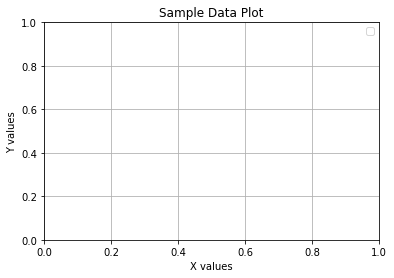

In [5]:
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Sample Data Plot')
plt.grid(True)
plt.legend(['Data'])
plt.show()


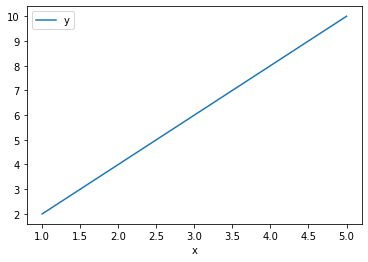

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a DataFrame named 'data' with some sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]})

# Plot the DataFrame
data.plot(x='x', y='y')
plt.show()


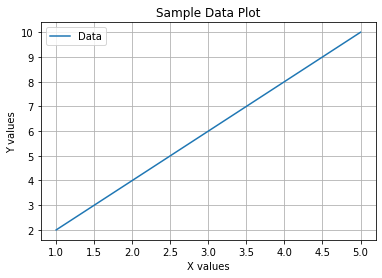

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_data(data):
    # Plot the data
    data.plot(x='x', y='y')
    
    # Customize the plot
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Sample Data Plot')
    plt.grid(True)
    plt.legend(['Data'])
    
    # Show the plot
    plt.show()

# Define a DataFrame named 'data' with some sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]})

# Call the visualize_data function
visualize_data(data)
